In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!ls

sample_data


In [3]:
!pip install chardet

In [4]:
import chardet

In [6]:
with open('_ACCS_Case_Study_Data.csv', 'rb') as f:
  encoding = chardet.detect(f.read())['encoding']

In [7]:
data = pd.read_csv('_ACCS_Case_Study_Data.csv', encoding=encoding)

In [8]:
data

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,01-01-2012,06-01-2012,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,$408.30,2,0%,$106.14
1,01-01-2012,08-01-2012,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,$120.37,3,10%,$36.04
2,01-01-2012,05-01-2012,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,$66.12,4,0%,$29.64
3,01-01-2012,05-01-2012,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,$44.87,3,50%,-$26.06
4,01-01-2012,08-01-2012,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,$113.67,5,10%,$37.77
...,...,...,...,...,...,...,...,...,...,...,...
51285,31-12-2015,05-01-2016,Liz Preis,Kerala,Office Supplies,Consumer,Binders,$3.99,1,0%,$0.42
51286,31-12-2015,07-01-2016,Kalyca Meade,Chandigarh,Office Supplies,Corporate,Paper,$79.47,3,0%,$25.38
51287,31-12-2015,02-01-2016,Charlotte Melton,Gujarat,Office Supplies,Consumer,Labels,$26.40,3,0%,$12.36
51288,31-12-2015,04-01-2016,Julia Barnett,Jammu and Kashmir,Office Supplies,Home Office,Labels,$16.74,3,0%,$0.66


In [9]:
data.head()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,01-01-2012,06-01-2012,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,$408.30,2,0%,$106.14
1,01-01-2012,08-01-2012,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,$120.37,3,10%,$36.04
2,01-01-2012,05-01-2012,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,$66.12,4,0%,$29.64
3,01-01-2012,05-01-2012,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,$44.87,3,50%,-$26.06
4,01-01-2012,08-01-2012,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,$113.67,5,10%,$37.77


In [10]:
data.tail()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
51285,31-12-2015,05-01-2016,Liz Preis,Kerala,Office Supplies,Consumer,Binders,$3.99,1,0%,$0.42
51286,31-12-2015,07-01-2016,Kalyca Meade,Chandigarh,Office Supplies,Corporate,Paper,$79.47,3,0%,$25.38
51287,31-12-2015,02-01-2016,Charlotte Melton,Gujarat,Office Supplies,Consumer,Labels,$26.40,3,0%,$12.36
51288,31-12-2015,04-01-2016,Julia Barnett,Jammu and Kashmir,Office Supplies,Home Office,Labels,$16.74,3,0%,$0.66
51289,31-12-2015,06-01-2016,Tamara Dahlen,Telangana,Office Supplies,Consumer,Labels,$7.12,1,0%,$0.56


In [11]:
data.columns

Index(['Order Date', 'Ship Date', 'Customer Name', 'State', 'Category',
       'Segment', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#descriptive statistics
data.describe()

In [13]:
data.info()# to check structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Date     51290 non-null  object
 1   Ship Date      51290 non-null  object
 2   Customer Name  51290 non-null  object
 3   State          51290 non-null  object
 4   Category       51290 non-null  object
 5   Segment        51290 non-null  object
 6   Sub-Category   51290 non-null  object
 7   Sales          51290 non-null  object
 8   Quantity       51290 non-null  int64 
 9   Discount       51290 non-null  object
 10  Profit         51290 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [14]:
#checking null values
data.isnull().sum()

Order Date       0
Ship Date        0
Customer Name    0
State            0
Category         0
Segment          0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [15]:
#checking duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [21]:
import pandas as pd

# Assuming 'Order Date' and 'Ship Date' need conversion to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', format='%m-%d-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce', format='%m-%d-%Y')

# Convert 'Sales', 'Discount', and 'Profit' to numeric types
data['Sales'] = pd.to_numeric(data['Sales'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
data['Discount'] = pd.to_numeric(data['Discount'].astype(str).str.replace('%', '', regex=True), errors='coerce')
data['Profit'] = pd.to_numeric(data['Profit'].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')

# Now you can continue with your analysis


In [22]:
data['Profit']


0        106.14
1         36.04
2         29.64
3        -26.06
4         37.77
          ...  
51285      0.42
51286     25.38
51287     12.36
51288      0.66
51289      0.56
Name: Profit, Length: 51290, dtype: float64

In [24]:
#checking which year got highest profit
data['Year'] = data['Order Date'].dt.year

max_profit_row = data.loc[data['Profit'].idxmax()]

highest_profit = max_profit_row['Profit']
corresponding_year = max_profit_row['Year']

print("Highest Profit:", highest_profit)
print("Year with Highest Profit:", corresponding_year)

Highest Profit: 8399.98
Year with Highest Profit: 2014.0


In [26]:
# checking which category got highest  profit
highest_profit_category = max_profit_row['Category']
highest_profit_sales = max_profit_row['Sales']

print("Category with Highest Profit:", highest_profit_category)
print("Sales for the Category with Highest Profit:", highest_profit_sales)

Category with Highest Profit: Technology
Sales for the Category with Highest Profit: 17499.95


In [28]:
technology_data = data[data['Category'] == 'Technology']

# Group by 'State' and calculating total profit for each state
state_profits = technology_data.groupby('State')['Profit'].sum()

print("States with Technology as a Category and Their Profits:")
print(state_profits)

States with Technology as a Category and Their Profits:
State
Andhra Pradesh       27109.17
Assam                33505.56
Bihar                31652.99
Chandigarh           25790.73
Chhattisgarh         24097.47
Delhi                18532.71
Gujarat              29803.32
Haryana              21387.79
Jammu and Kashmir    27082.01
Jharkhand            23060.95
Karnataka            23552.46
Kerala               40059.98
Madhya Pradesh       22900.55
Maharashtra          41408.29
Manipur              22465.46
Odisha               21177.46
Puducherry           23288.72
Punjab               22245.52
Rajasthan            19451.79
Tamil Nadu           22366.64
Telangana            31258.82
Tripura              30422.93
Uttar Pradesh        20722.31
Uttarakhand          27061.72
West Bengal          33373.86
Name: Profit, dtype: float64


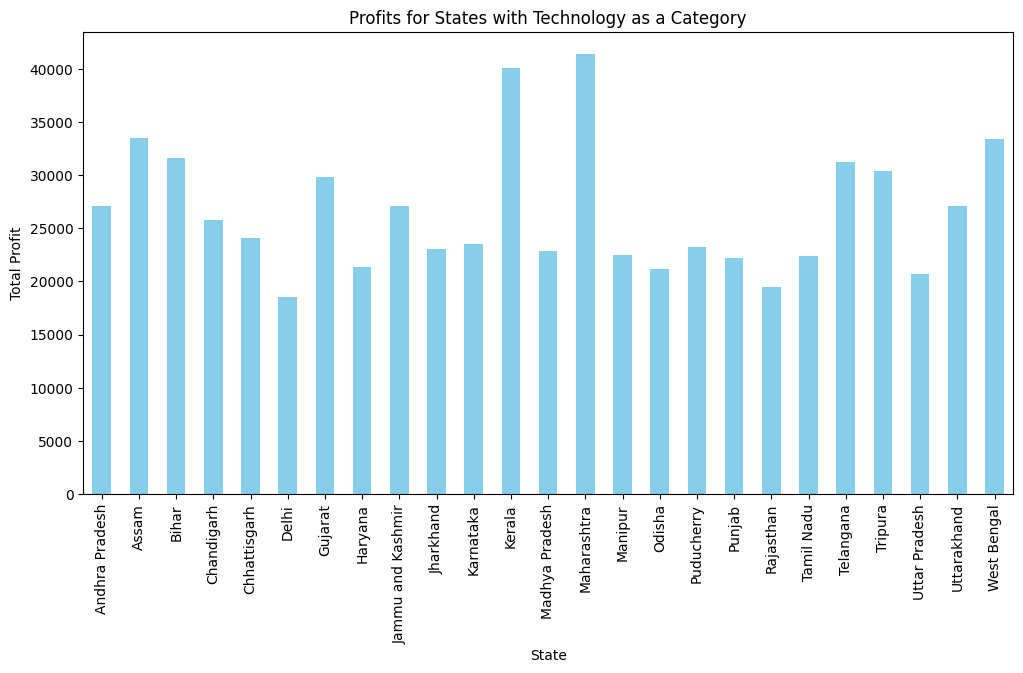

In [30]:
#visualizing
# Assuming 'States with Technology as a Category and Their Profits' is a Series
state_profits.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Profits for States with Technology as a Category')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()


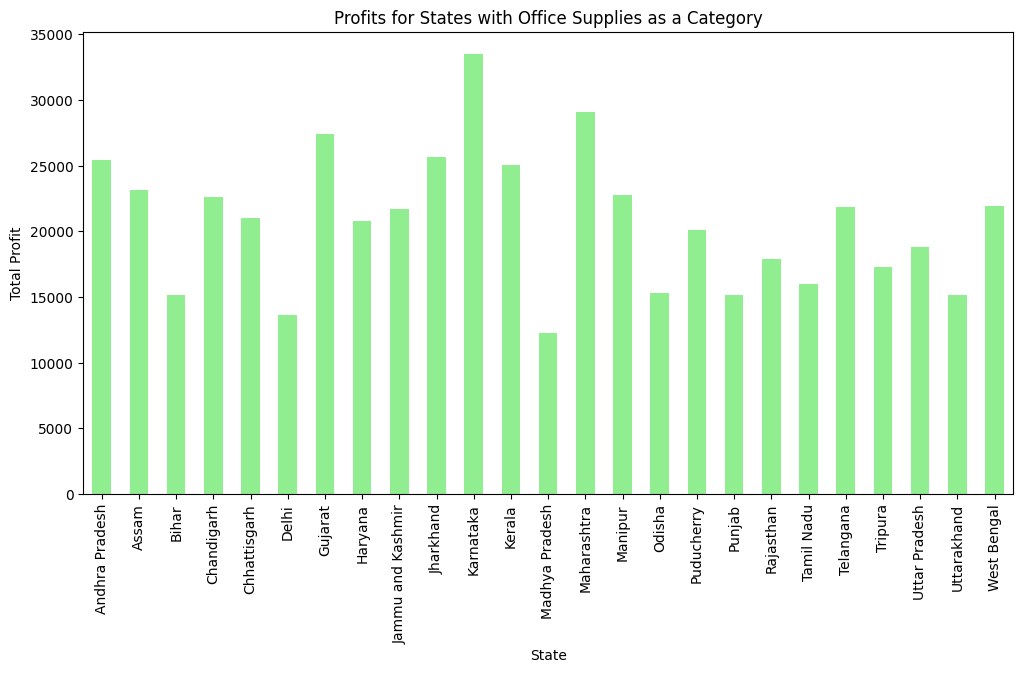

In [31]:
#for office supplies
office_supplies_data = data[data['Category'] == 'Office Supplies']

# Group by 'State' and calculate total profit for each state
state_profits_office_supplies = office_supplies_data.groupby('State')['Profit'].sum()

# Visualize the profits for each state
state_profits_office_supplies.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Profits for States with Office Supplies as a Category')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

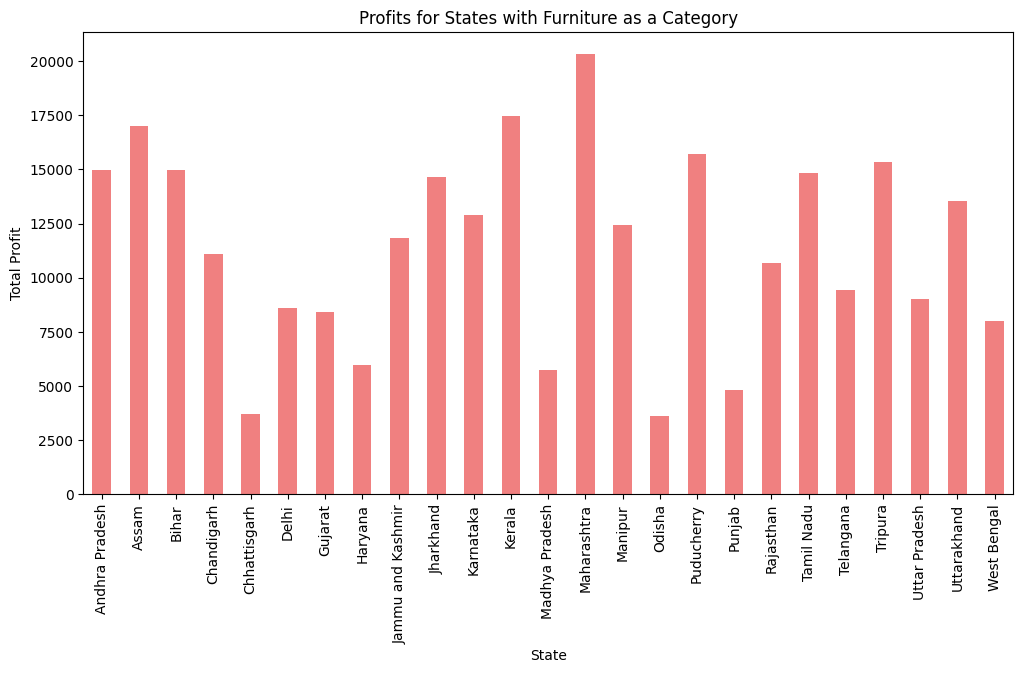

In [32]:
furniture_data = data[data['Category'] == 'Furniture']

# Group by 'State' and calculate total profit for each state
state_profits_furniture = furniture_data.groupby('State')['Profit'].sum()

# Visualize the profits for each state
state_profits_furniture.plot(kind='bar', figsize=(12, 6), color='lightcoral')
plt.title('Profits for States with Furniture as a Category')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

In [33]:
# Create separate DataFrames for each category
furniture_data = data[data['Category'] == 'Furniture']
technology_data = data[data['Category'] == 'Technology']
office_supplies_data = data[data['Category'] == 'Office Supplies']

# Find the state with the highest profit for each category
state_highest_profit_furniture = furniture_data.loc[furniture_data['Profit'].idxmax()]['State']
state_highest_profit_technology = technology_data.loc[technology_data['Profit'].idxmax()]['State']
state_highest_profit_office_supplies = office_supplies_data.loc[office_supplies_data['Profit'].idxmax()]['State']

print("State with the Highest Profit for Furniture:", state_highest_profit_furniture)
print("State with the Highest Profit for Technology:", state_highest_profit_technology)
print("State with the Highest Profit for Office Supplies:", state_highest_profit_office_supplies)

State with the Highest Profit for Furniture: Rajasthan
State with the Highest Profit for Technology: Tripura
State with the Highest Profit for Office Supplies: Karnataka


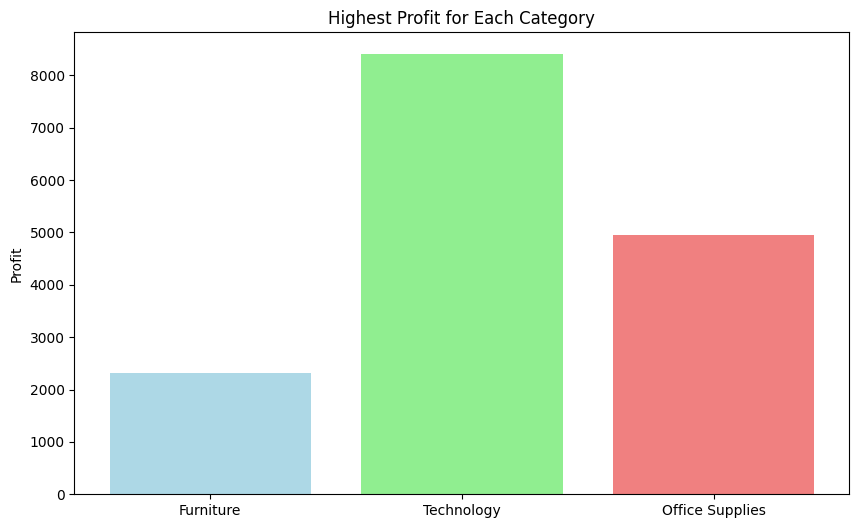

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Furniture', 'Technology', 'Office Supplies']
highest_profits = [furniture_data['Profit'].max(), technology_data['Profit'].max(), office_supplies_data['Profit'].max()]

ax.bar(categories, highest_profits, color=['lightblue', 'lightgreen', 'lightcoral'])
ax.set_ylabel('Profit')
ax.set_title('Highest Profit for Each Category')

plt.show()

In [36]:
max_profit_row = data.loc[data['Profit'].idxmax()]

# Extract information from the row
customer_name_highest_profit = max_profit_row['Customer Name']
state_highest_profit = max_profit_row['State']
category_highest_profit = max_profit_row['Category']
segment_highest_profit = max_profit_row['Segment']
sub_category_highest_profit = max_profit_row['Sub-Category']
sales_highest_profit = max_profit_row['Sales']
profit_highest_profit = max_profit_row['Profit']

print("Customer Name with the Highest Profit:", customer_name_highest_profit)
print("State for the Highest Profit:", state_highest_profit)
print("Category for the Highest Profit:", category_highest_profit)
print("Segment for the Highest Profit:", segment_highest_profit)
print("Sub-Category for the Highest Profit:", sub_category_highest_profit)
print("Sales for the Highest Profit:", sales_highest_profit)
print("Profit Amount:", profit_highest_profit)

Customer Name with the Highest Profit: Tamara Chand
State for the Highest Profit: Tripura
Category for the Highest Profit: Technology
Segment for the Highest Profit: Corporate
Sub-Category for the Highest Profit: Copiers
Sales for the Highest Profit: 17499.95
Profit Amount: 8399.98


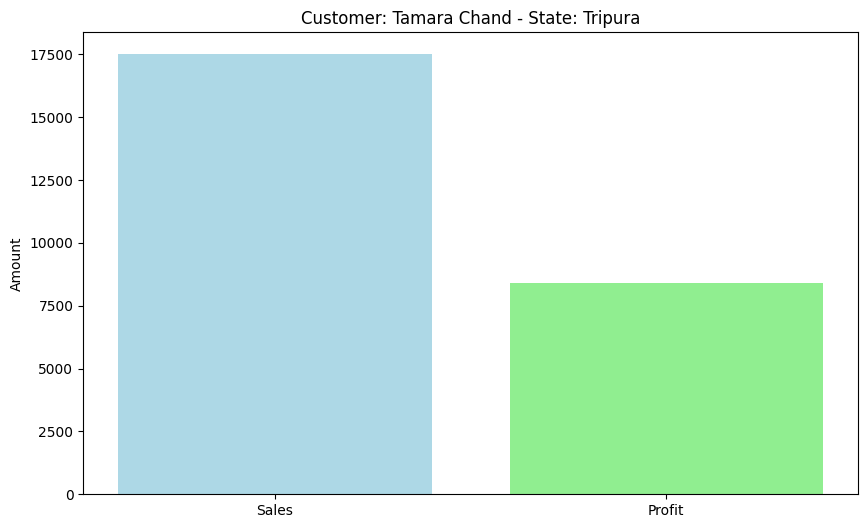

In [39]:

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Sales and Profit
ax.bar(['Sales', 'Profit'], [sales_highest_profit, profit_highest_profit], color=['lightblue', 'lightgreen'])
ax.set_ylabel('Amount')
ax.set_title(f'Customer: {customer_name_highest_profit} - State: {state_highest_profit}')

plt.show()

In [45]:
maharashtra_data = data[data['State'] == 'Maharashtra']

# Group by 'Customer Name', 'Sub-Category' and calculate total profit for each combination
customer_subcategory_profit = maharashtra_data.groupby(['Customer Name', 'Sub-Category'])['Profit'].sum().reset_index()

print("Customer Names from Maharashtra with Sub-Category and Profits:")
print(customer_subcategory_profit)

Customer Names from Maharashtra with Sub-Category and Profits:
        Customer Name Sub-Category  Profit
0         Alyssa Tate  Accessories -133.28
1         Alyssa Tate   Appliances  866.16
2         Alyssa Tate          Art  -96.35
3         Alyssa Tate      Binders   26.65
4         Alyssa Tate    Bookcases  -58.56
..                ...          ...     ...
652  Victoria Pisteka        Paper   86.60
653  Victoria Pisteka       Phones  213.47
654  Victoria Pisteka      Storage  278.06
655  Victoria Pisteka     Supplies   68.64
656  Victoria Pisteka       Tables -968.88

[657 rows x 3 columns]


In [46]:
loss_data = customer_subcategory_profit[customer_subcategory_profit['Profit'] < 0]
print("Customer Names from Maharashtra with Loss (Negative Profit):")
print(loss_data)

Customer Names from Maharashtra with Loss (Negative Profit):
        Customer Name Sub-Category  Profit
0         Alyssa Tate  Accessories -133.28
2         Alyssa Tate          Art  -96.35
4         Alyssa Tate    Bookcases  -58.56
6         Alyssa Tate    Envelopes   -3.92
8         Alyssa Tate  Furnishings  -40.76
..                ...          ...     ...
623   Thomas Thornton       Phones   -1.15
643  Victoria Pisteka          Art  -40.10
644  Victoria Pisteka      Binders  -23.23
646  Victoria Pisteka       Chairs -101.81
656  Victoria Pisteka       Tables -968.88

[133 rows x 3 columns]


In [47]:
maharashtra_data = data[data['State'] == 'Maharashtra']

# Group by 'Category' and the total loss for each category
category_total_loss = maharashtra_data[maharashtra_data['Profit'] < 0].groupby('Category')['Profit'].sum()

# Find the category with the highest total loss
category_highest_loss = category_total_loss.idxmin()

print("Category with the Highest Total Loss in Maharashtra:", category_highest_loss)

Category with the Highest Total Loss in Maharashtra: Furniture


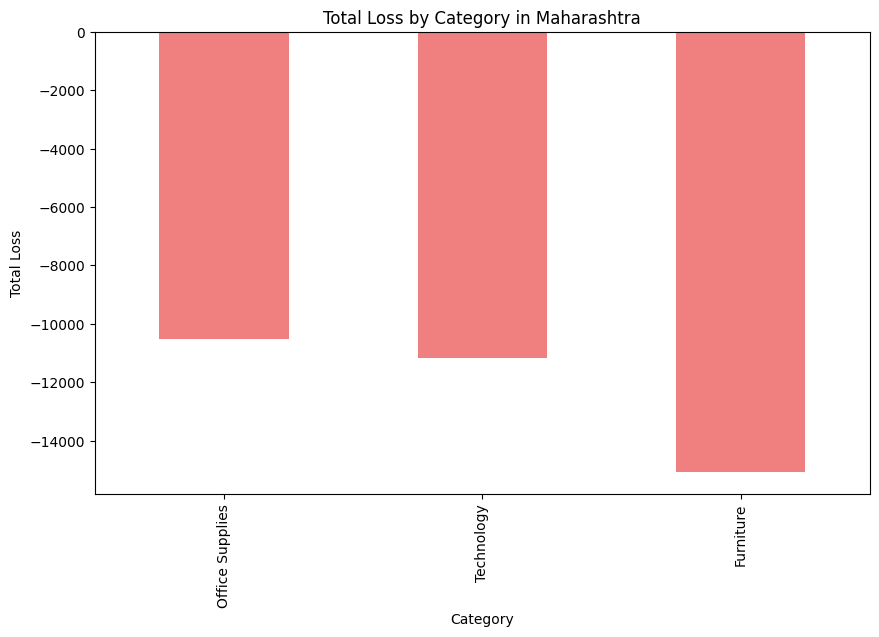

In [53]:

# Visualize the categories with their total losses
fig, ax = plt.subplots(figsize=(10, 6))
category_total_loss.plot(kind='bar', color='lightcoral')
ax.set_ylabel('Total Loss')
ax.set_title('Total Loss by Category in Maharashtra')

plt.show()

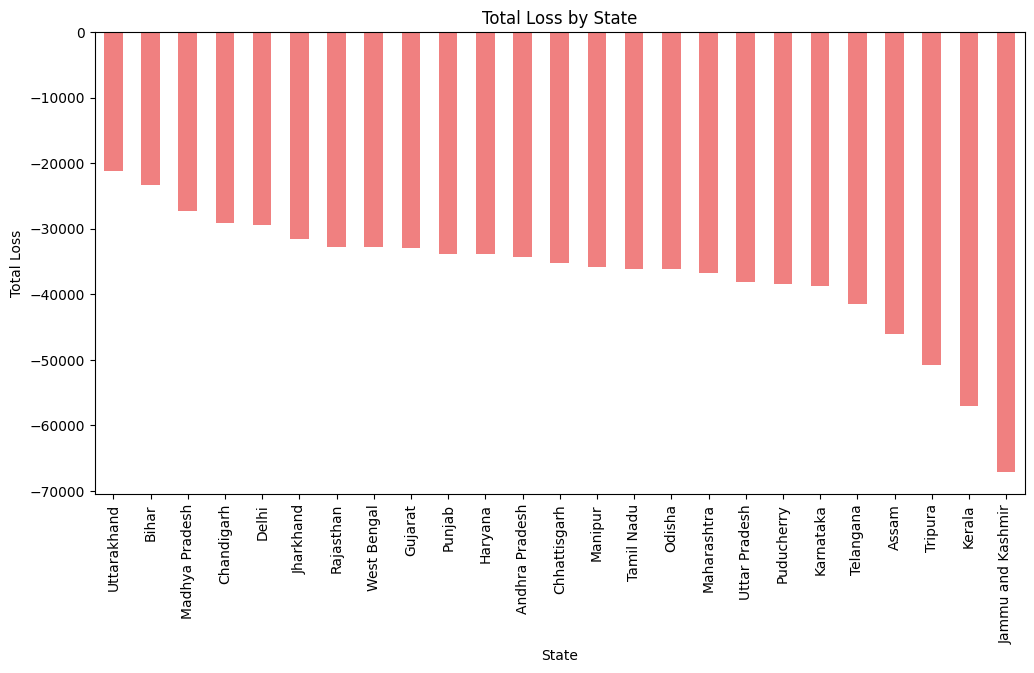

In [55]:
state_total_loss = data[data['Profit'] < 0].groupby('State')['Profit'].sum()

# Sort the values in descending order
state_total_loss = state_total_loss.sort_values(ascending=False)

# Visualize the states with their total losses
fig, ax = plt.subplots(figsize=(12, 6))
state_total_loss.plot(kind='bar', color='lightcoral')
ax.set_title('Total Loss by State')
ax.set_ylabel('Total Loss')


plt.show()

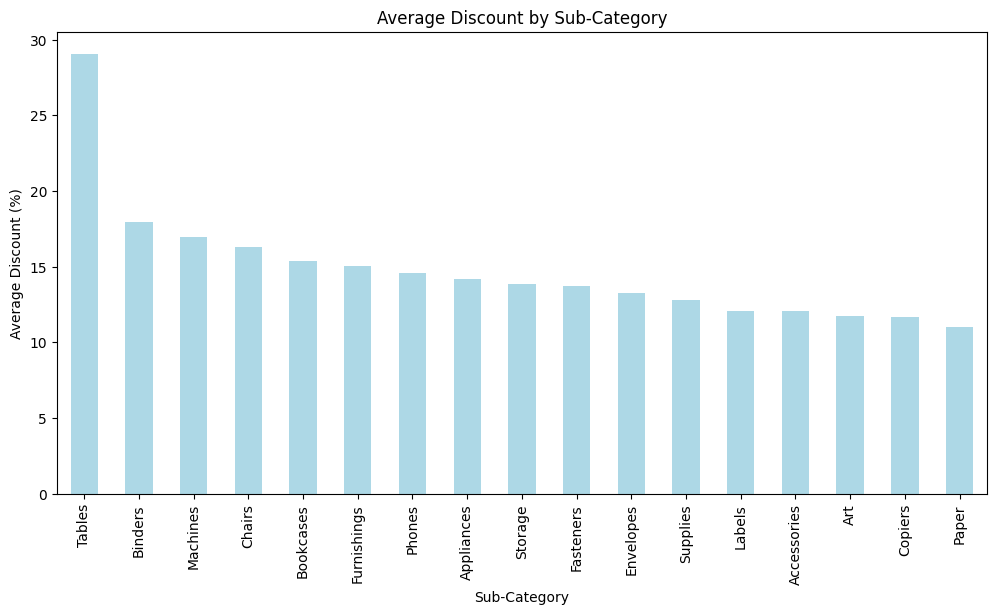

In [57]:
sub_category_avg_discount = data.groupby('Sub-Category')['Discount'].mean()

# Sort the values in descending order
sub_category_avg_discount = sub_category_avg_discount.sort_values(ascending=False)

# Visualize the sub-categories with their average discounts
fig, ax = plt.subplots(figsize=(12, 6))
sub_category_avg_discount.plot(kind='bar', color='lightblue')
ax.set_ylabel('Average Discount (%)')
ax.set_title('Average Discount by Sub-Category')

plt.show()

In [58]:
yearly_total_loss = data[data['Profit'] < 0].groupby(data['Order Date'].dt.year)['Profit'].sum()

# Find the year with the highest total loss
year_highest_loss = yearly_total_loss.idxmin()

print("Year with the Highest Total Loss:", year_highest_loss)

Year with the Highest Total Loss: 2015.0


In [59]:
sales_2015 = data[data['Order Date'].dt.year == 2015]['Sales'].sum()

print("Total Sales in the Year 2015:", sales_2015)

Total Sales in the Year 2015: 1621903.87


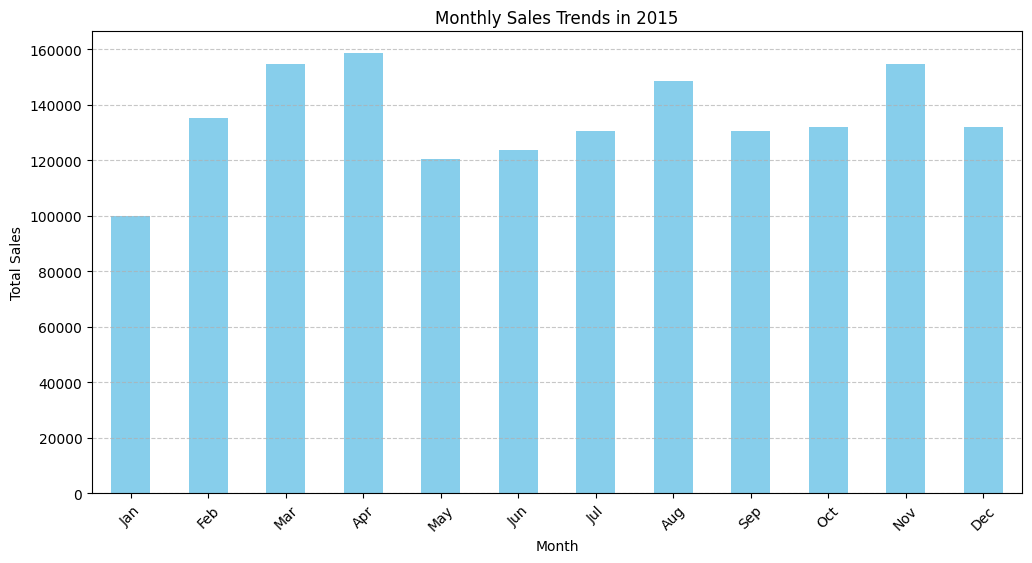

In [63]:
sales_2015 = data[data['Order Date'].dt.year == 2015]

# Group by month and calculate the total sales for each month
monthly_sales_2015 = sales_2015.groupby(sales_2015['Order Date'].dt.month)['Sales'].sum()

# Visualize the monthly sales for 2015 with additional customization
fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales_2015.plot(kind='bar', color='skyblue')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Monthly Sales Trends in 2015')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

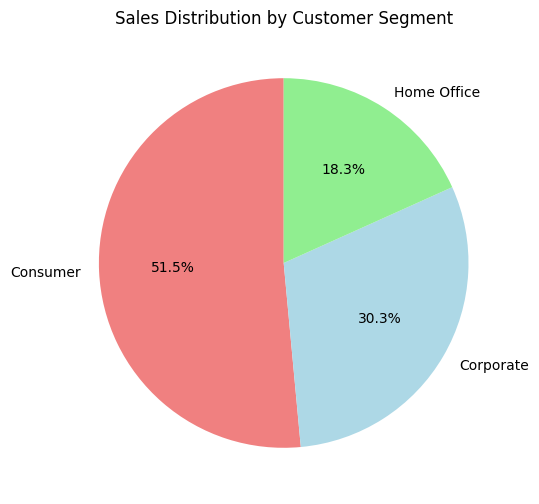

In [67]:

customer_segment_data = data.groupby('Segment')['Sales'].sum()

# Visualize sales by customer segment
fig, ax = plt.subplots(figsize=(8, 6))
customer_segment_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
ax.set_ylabel('')
ax.set_title('Sales Distribution by Customer Segment')

plt.show()



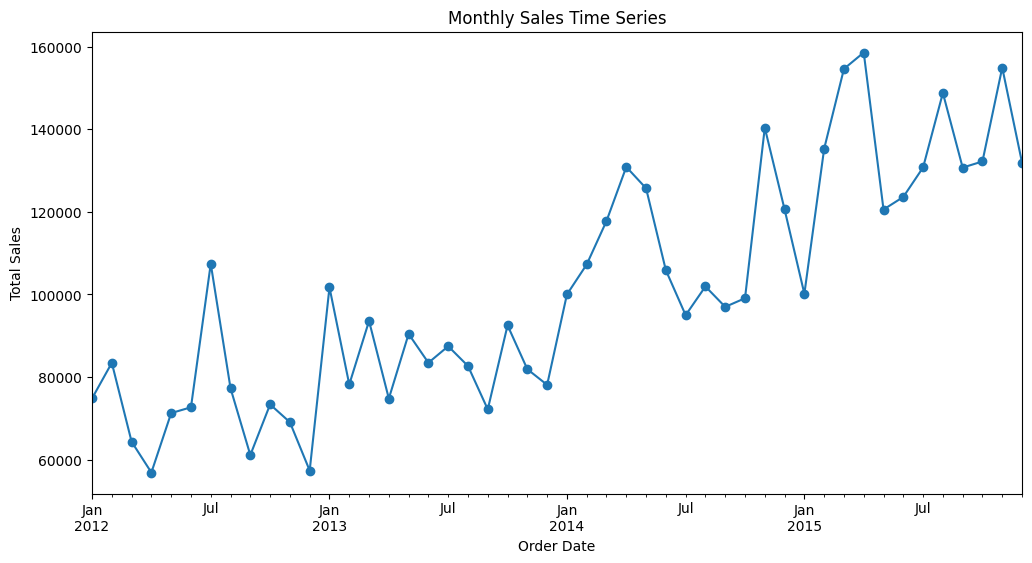

In [68]:
time_series_data = data.set_index('Order Date')

# Resample the data by month and calculate total sales for each month
monthly_sales = time_series_data['Sales'].resample('M').sum()

# Visualize the monthly sales time series
fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-')
ax.set_ylabel('Total Sales')
ax.set_title('Monthly Sales Time Series')

plt.show()

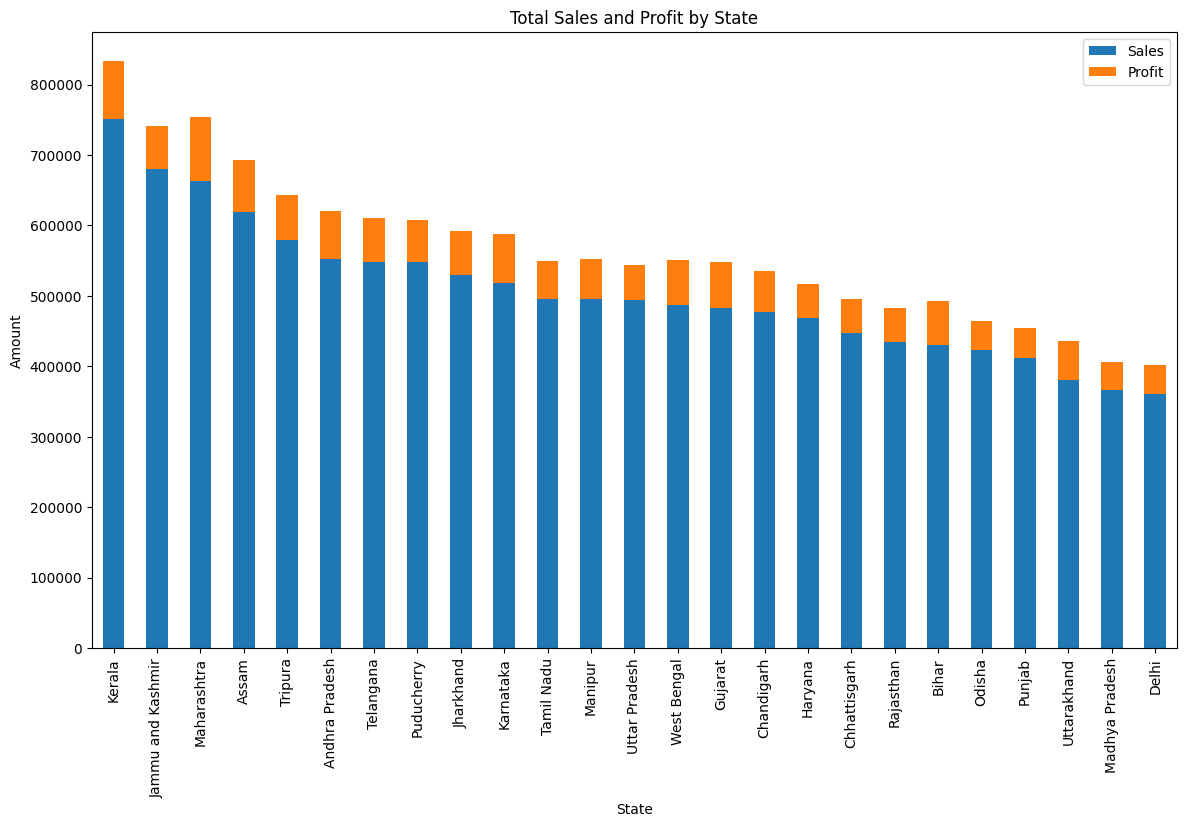

In [69]:
state_sales_profit = data.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'})

# Visualize the total sales and profit by state
fig, ax = plt.subplots(figsize=(14, 8))
state_sales_profit.sort_values(by='Sales', ascending=False).plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by State')

plt.show()

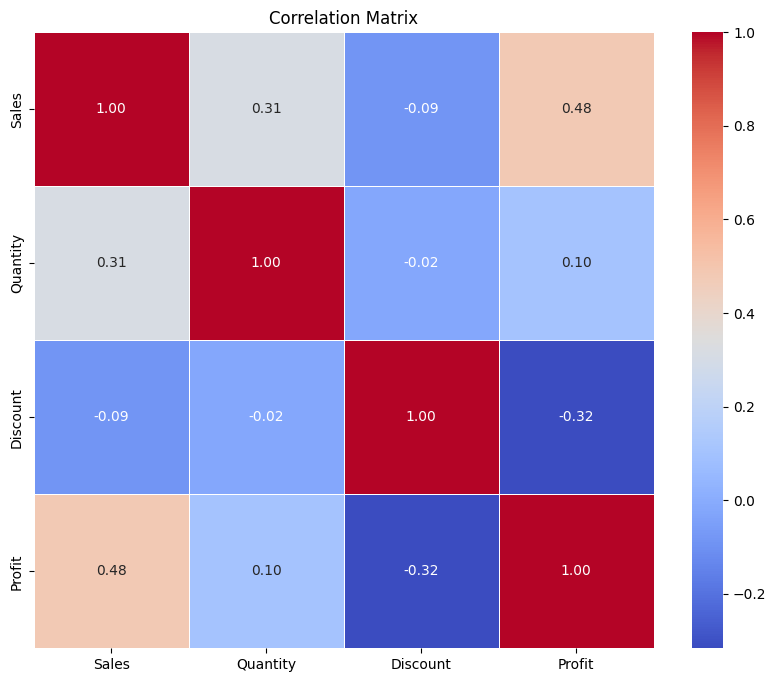

In [70]:
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Create a correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

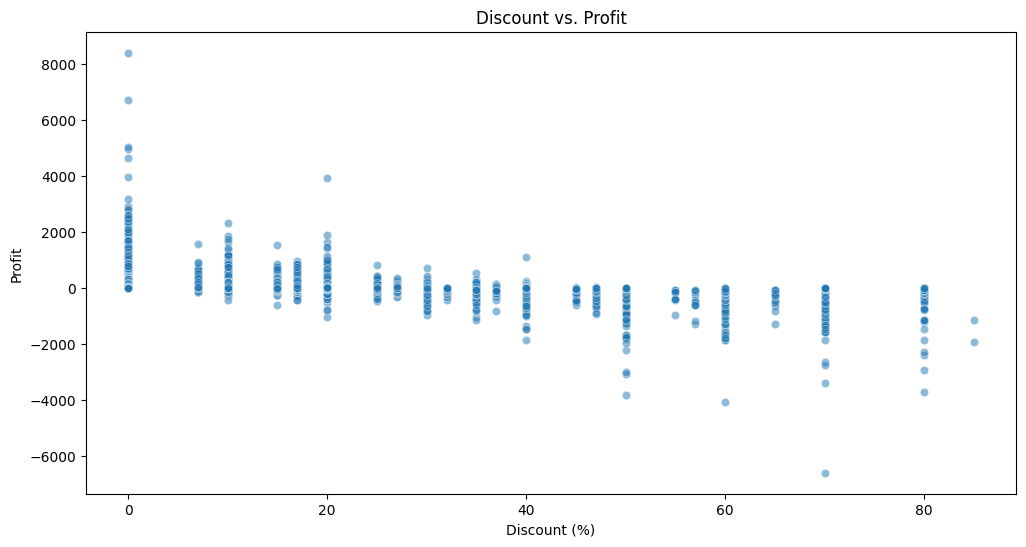

In [71]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', data=data, alpha=0.5)
plt.title('Discount vs. Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.show()

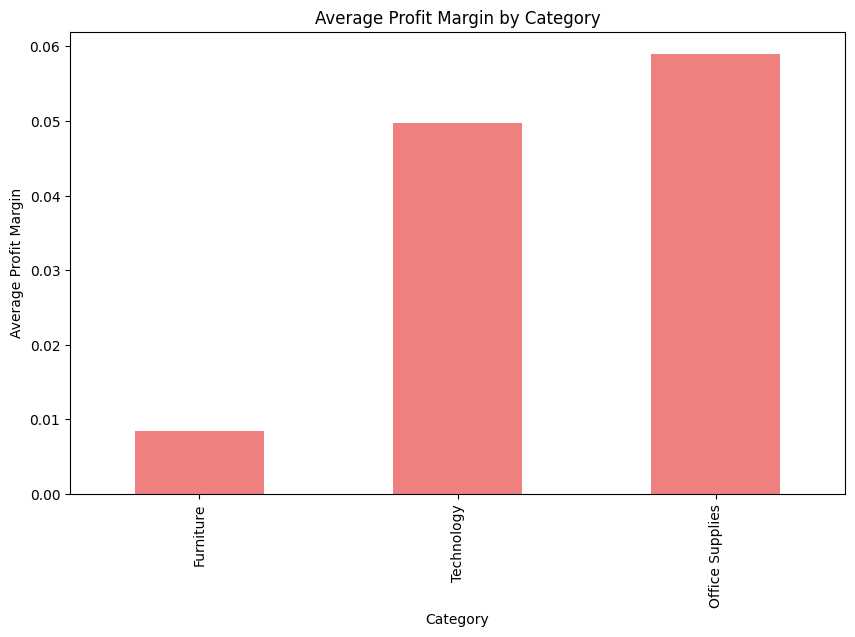

In [72]:
data['Profit Margin'] = data['Profit'] / data['Sales']

# Group by 'Category' and calculate the average profit margin for each category
category_profit_margin = data.groupby('Category')['Profit Margin'].mean()

# Visualize the average profit margin by category
fig, ax = plt.subplots(figsize=(10, 6))
category_profit_margin.sort_values().plot(kind='bar', color='lightcoral')
ax.set_ylabel('Average Profit Margin')
ax.set_title('Average Profit Margin by Category')

plt.show()

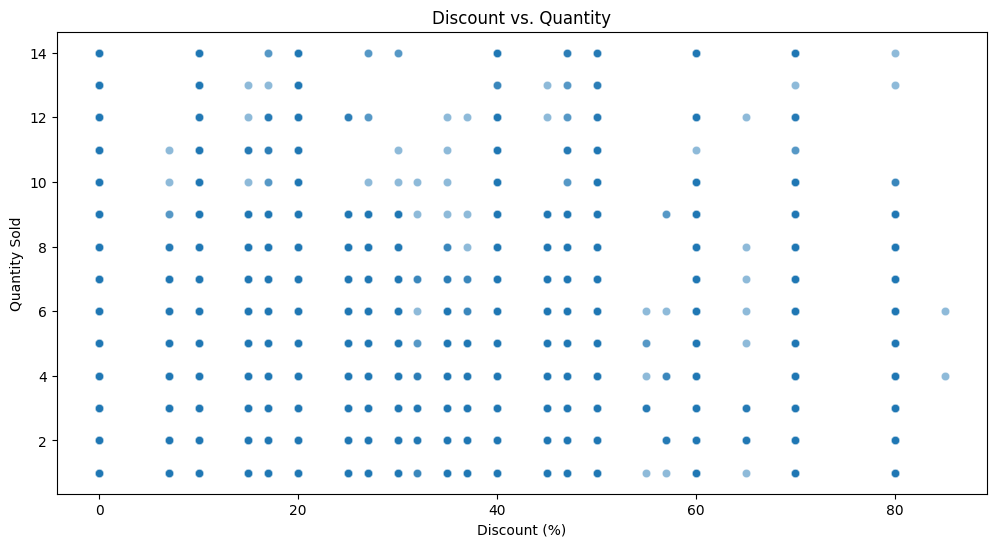

In [73]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Quantity', data=data, alpha=0.5)
plt.title('Discount vs. Quantity')
plt.xlabel('Discount (%)')
plt.ylabel('Quantity Sold')
plt.show()

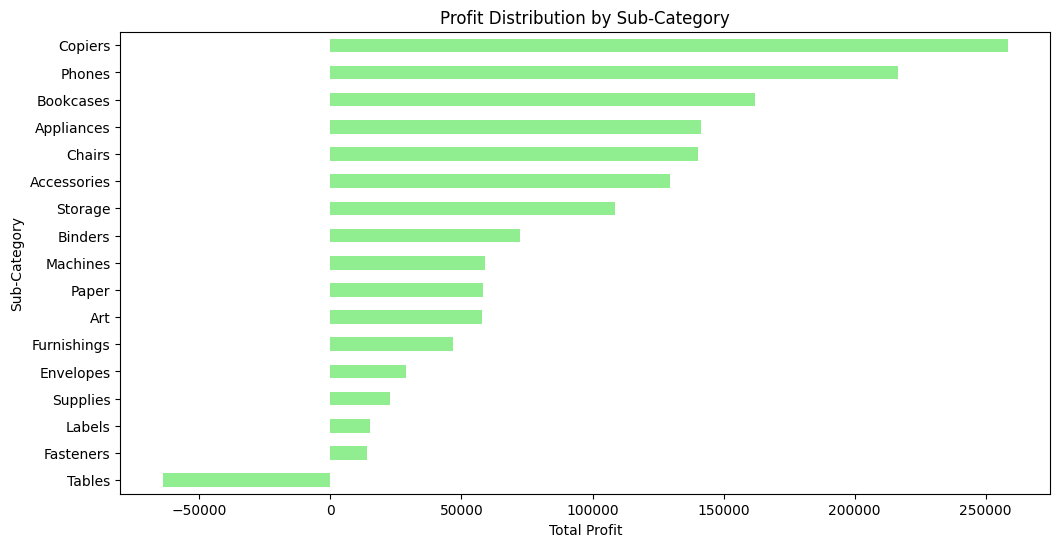

In [75]:
sub_category_profit = data.groupby('Sub-Category')['Profit'].sum()

# Visualize the profit distribution by sub-category
fig, ax = plt.subplots(figsize=(12, 6))
sub_category_profit.sort_values().plot(kind='barh', color='lightgreen')
ax.set_xlabel('Total Profit')
ax.set_title('Profit Distribution by Sub-Category')

plt.show()

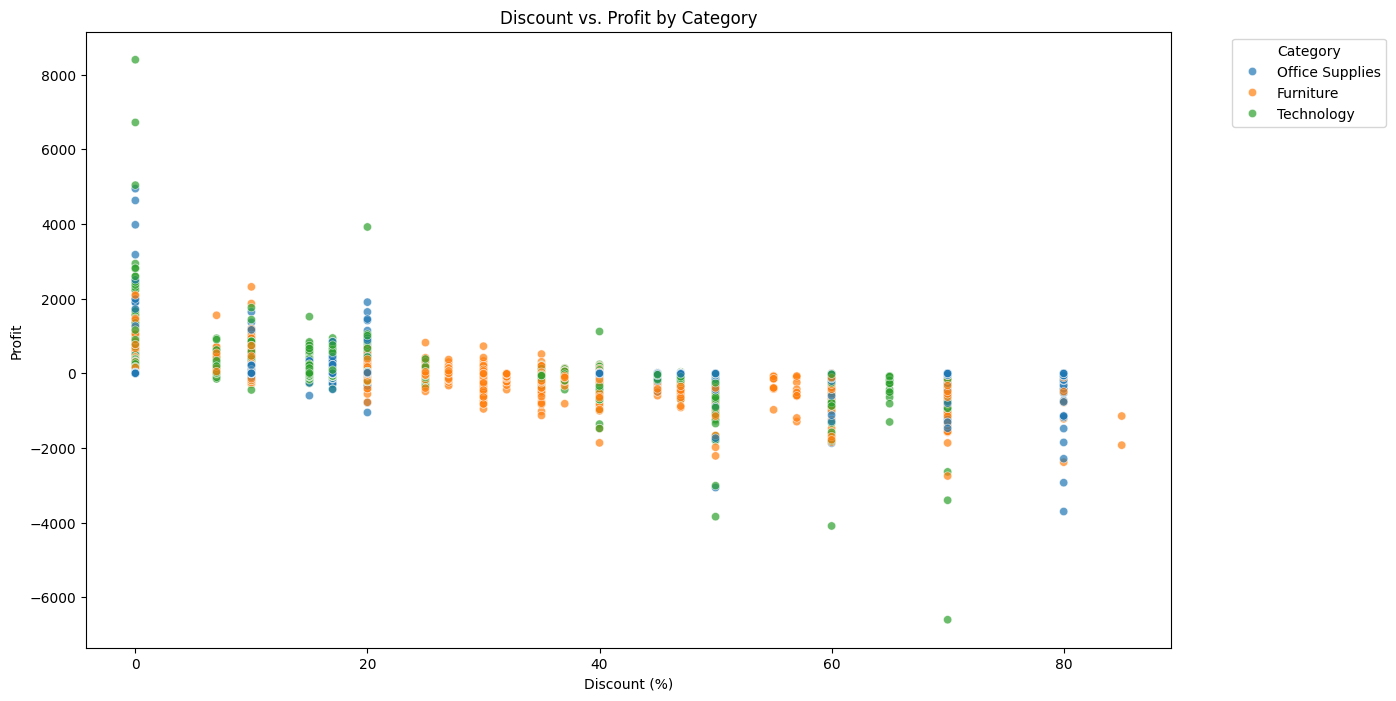

In [79]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=data, alpha=0.7)
plt.title('Discount vs. Profit by Category')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

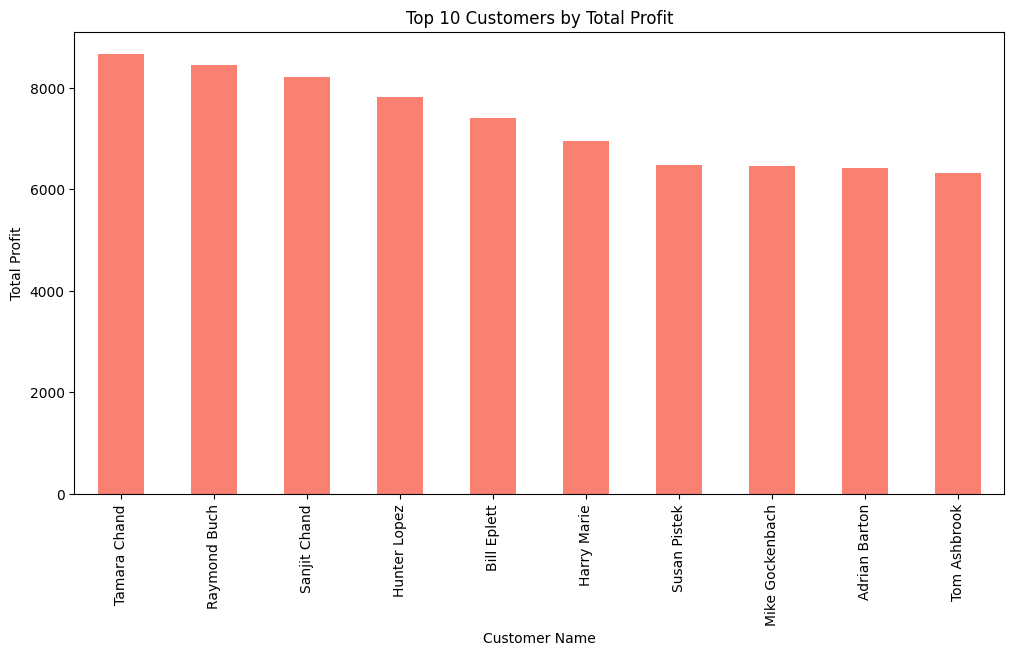

In [80]:
top_customers = data.groupby('Customer Name')['Profit'].sum().nlargest(10)

# Visualize the top customers and their total profits
fig, ax = plt.subplots(figsize=(12, 6))
top_customers.plot(kind='bar', color='salmon')
ax.set_ylabel('Total Profit')
ax.set_title('Top 10 Customers by Total Profit')

plt.show()

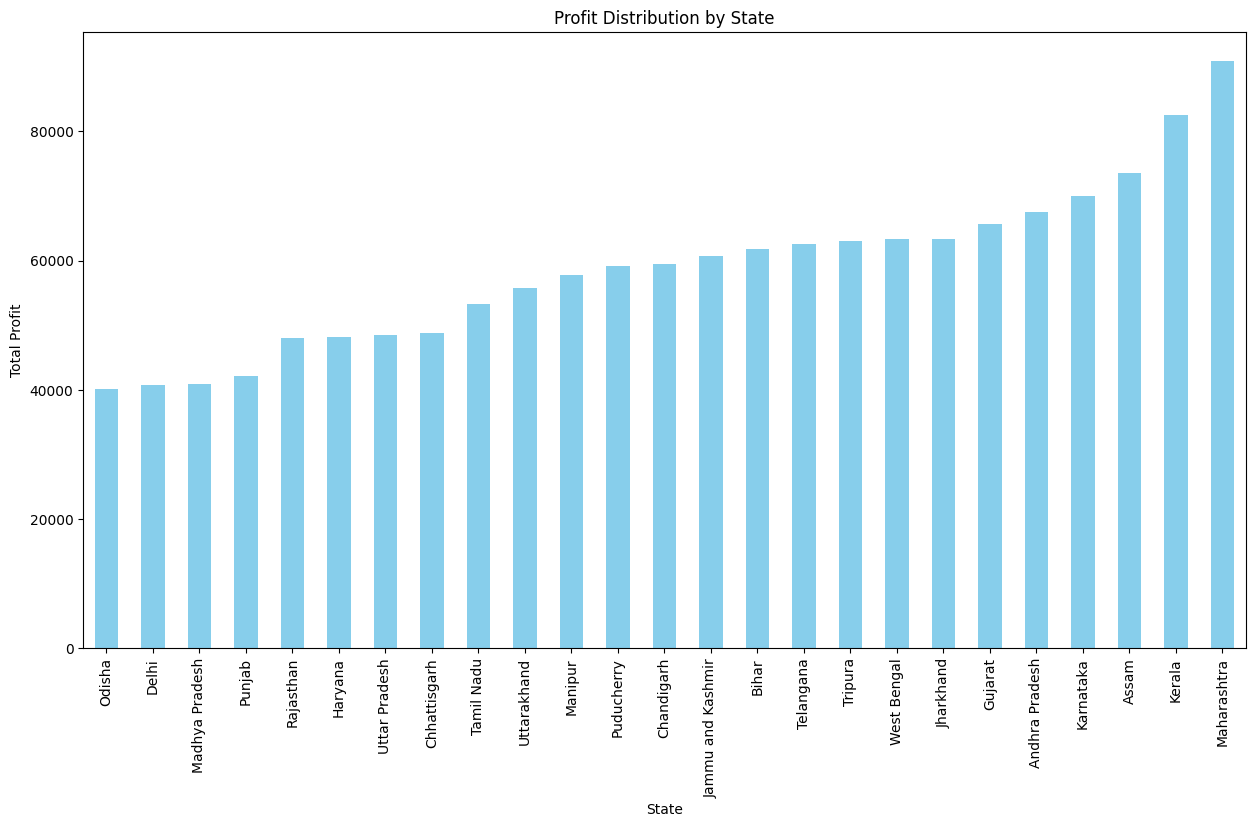

# New Section

# New Section